<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/CarPricePrediction.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description du problème :

Une société automobile chinoise Geely Auto aspire à pénétrer le marché américain en y installant son unité de fabrication et en produisant des voitures localement pour faire concurrence à ses homologues américains et européens.

 

Ils ont engagé une société de conseil automobile pour comprendre les facteurs dont dépend le prix des voitures. Plus précisément, ils veulent comprendre les facteurs affectant le prix des voitures sur le marché américain, car ceux-ci peuvent être très différents du marché chinois. L'entreprise veut savoir :

* Quelles variables sont significatives pour prédire le prix d'une voiture
* Dans quelle mesure ces variables décrivent bien le prix d'une voiture

# Travail à faire
Nous sommes amenés à modéliser le prix des voitures avec les variables indépendantes disponibles. Il sera utilisé par la direction pour comprendre comment exactement les prix varient avec les variables indépendantes. Ils peuvent donc manipuler la conception des voitures, la stratégie commerciale, etc. pour atteindre certains niveaux de prix. De plus, le modèle sera un bon moyen pour la direction de comprendre la dynamique des prix d'un nouveau marché.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt

pd.options.display.float_format='{:.4f}'.format

# Exploratory Data Analysis
## Analyse de la forme des données

d
- **variable target** : price
- **lignes et colonnes** : 205, 26
- **types de variables** : qualitatives : 10, quantitatives : 16
- **Analyse des valeurs manquantes** : pas de valeurs NaN dans le dataset


In [4]:
file="data/CarPrice_Assignment.csv"
df_auto = pd.read_csv(file)
df_auto.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/CarPrice_Assignment.csv'

object     10
int64       8
float64     8
dtype: int64

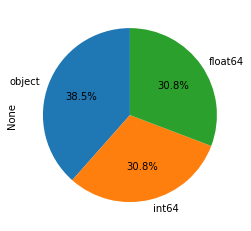

In [200]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%',startangle=90)
df.dtypes.value_counts()

In [201]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Analyse du Fond

### Examen de la colonne target
- Visualisation de la target :
     - Certaines fourchettes de prix supérieures à 36 000 peuvent être qualifiées de valeurs aberrantes, mais ne les supprimons pas, nous utiliserons plutôt une mise à l'échelle de normalisation.
     - Les parcelles semblent être asymétriques, les prix de presque toutes les voitures semblent inférieurs à 18 000.   

Text(0, 0.5, 'Price ')

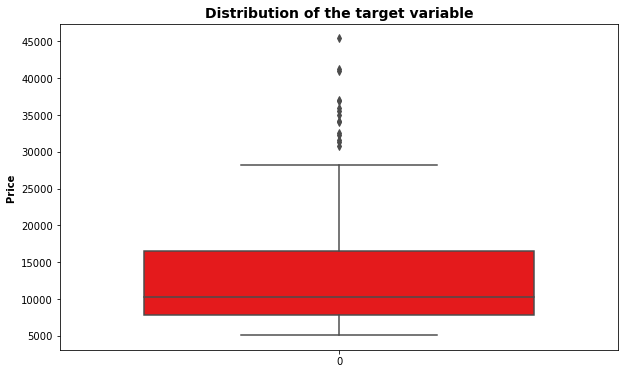

In [11]:
Target = 'price'
plt.figure(figsize=(10,6))
sns.boxplot(data=df_auto[Target], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Distribution of the target variable", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price ", fontweight = 'bold')



/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'La distribution des prix des voiture'}, xlabel='price', ylabel='Density'>

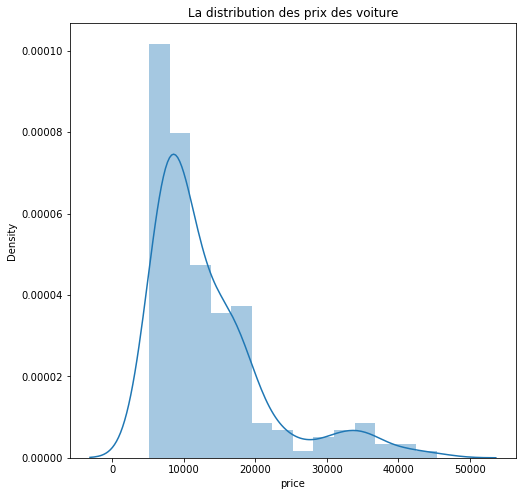

In [12]:
plt.figure(figsize=(8,8))

plt.title('La distribution des prix des voiture')
sns.distplot(df_auto['price'])

### Examen des variables
- Colone NameCar:
    - Toyota semble être la voiture la plus appréciée.
    - Mercury semble être la voiture la moins appréciée.
-  Observation globale des variable quantitative:
    - `carwidth` , `carlength`, `curbweight` ,`enginesize` ,`horsepower` semble avoir une corrélation poitive avec le prix.
    - `carheight` ne montre aucune tendance significative avec le prix.
    - `citympg` , `highwaympg` - semblent avoir une corrélation négative significative avec le prix.
-  Observation globale des variable quantitative:
    - Les voitures avec `fueltype` comme `diesel` sont relativement chères que les voitures avec `fueltype` comme `gas`.
    - Tous les types de carrosseries sont relativement moins chers que les carrosseries "convertibles".
    - Les voitures avec " `rear enginelocation` sont beaucoup plus chères que les voitures avec `front enginelocation`.
    - Le prix de la voiture est directement proportionnel à `no. de cylindres` dans la plupart des cas.
    - Le type de moteur `ohcv` entre dans les voitures de gamme de prix plus élevée.
    - `DoorNumber` n'affecte pas beaucoup le prix.
    - Les voitures HigerEnd semblent avoir une roue motrice "rwd"

In [202]:
df['CarName']=df['CarName'].str.split(' ',expand=True).loc[:,0]
df['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Erreur de frappe dans le nom de l'entreprise automobile**
- maxda = mazda
- Nissan = Nissan
- porsche = porsche
- toyota = toyota
- volkswagen = volkswagen = vw

In [203]:

df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [204]:
df = df.drop('car_ID',axis=1)

In [205]:
df =df.copy()
df['symboling'] = df['symboling'].astype(str)


In [206]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

Text(0, 0.5, 'nombre')

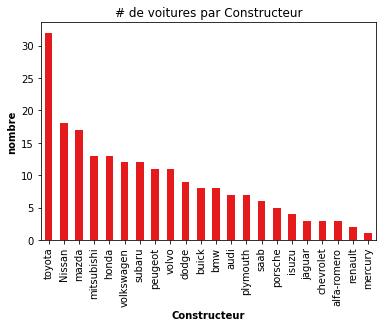

In [190]:

ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('# de voitures par Constructeur')
plt.xlabel("Constructeur",fontweight = 'bold')
plt.ylabel("nombre",fontweight = 'bold')

### histogrames des variables continues

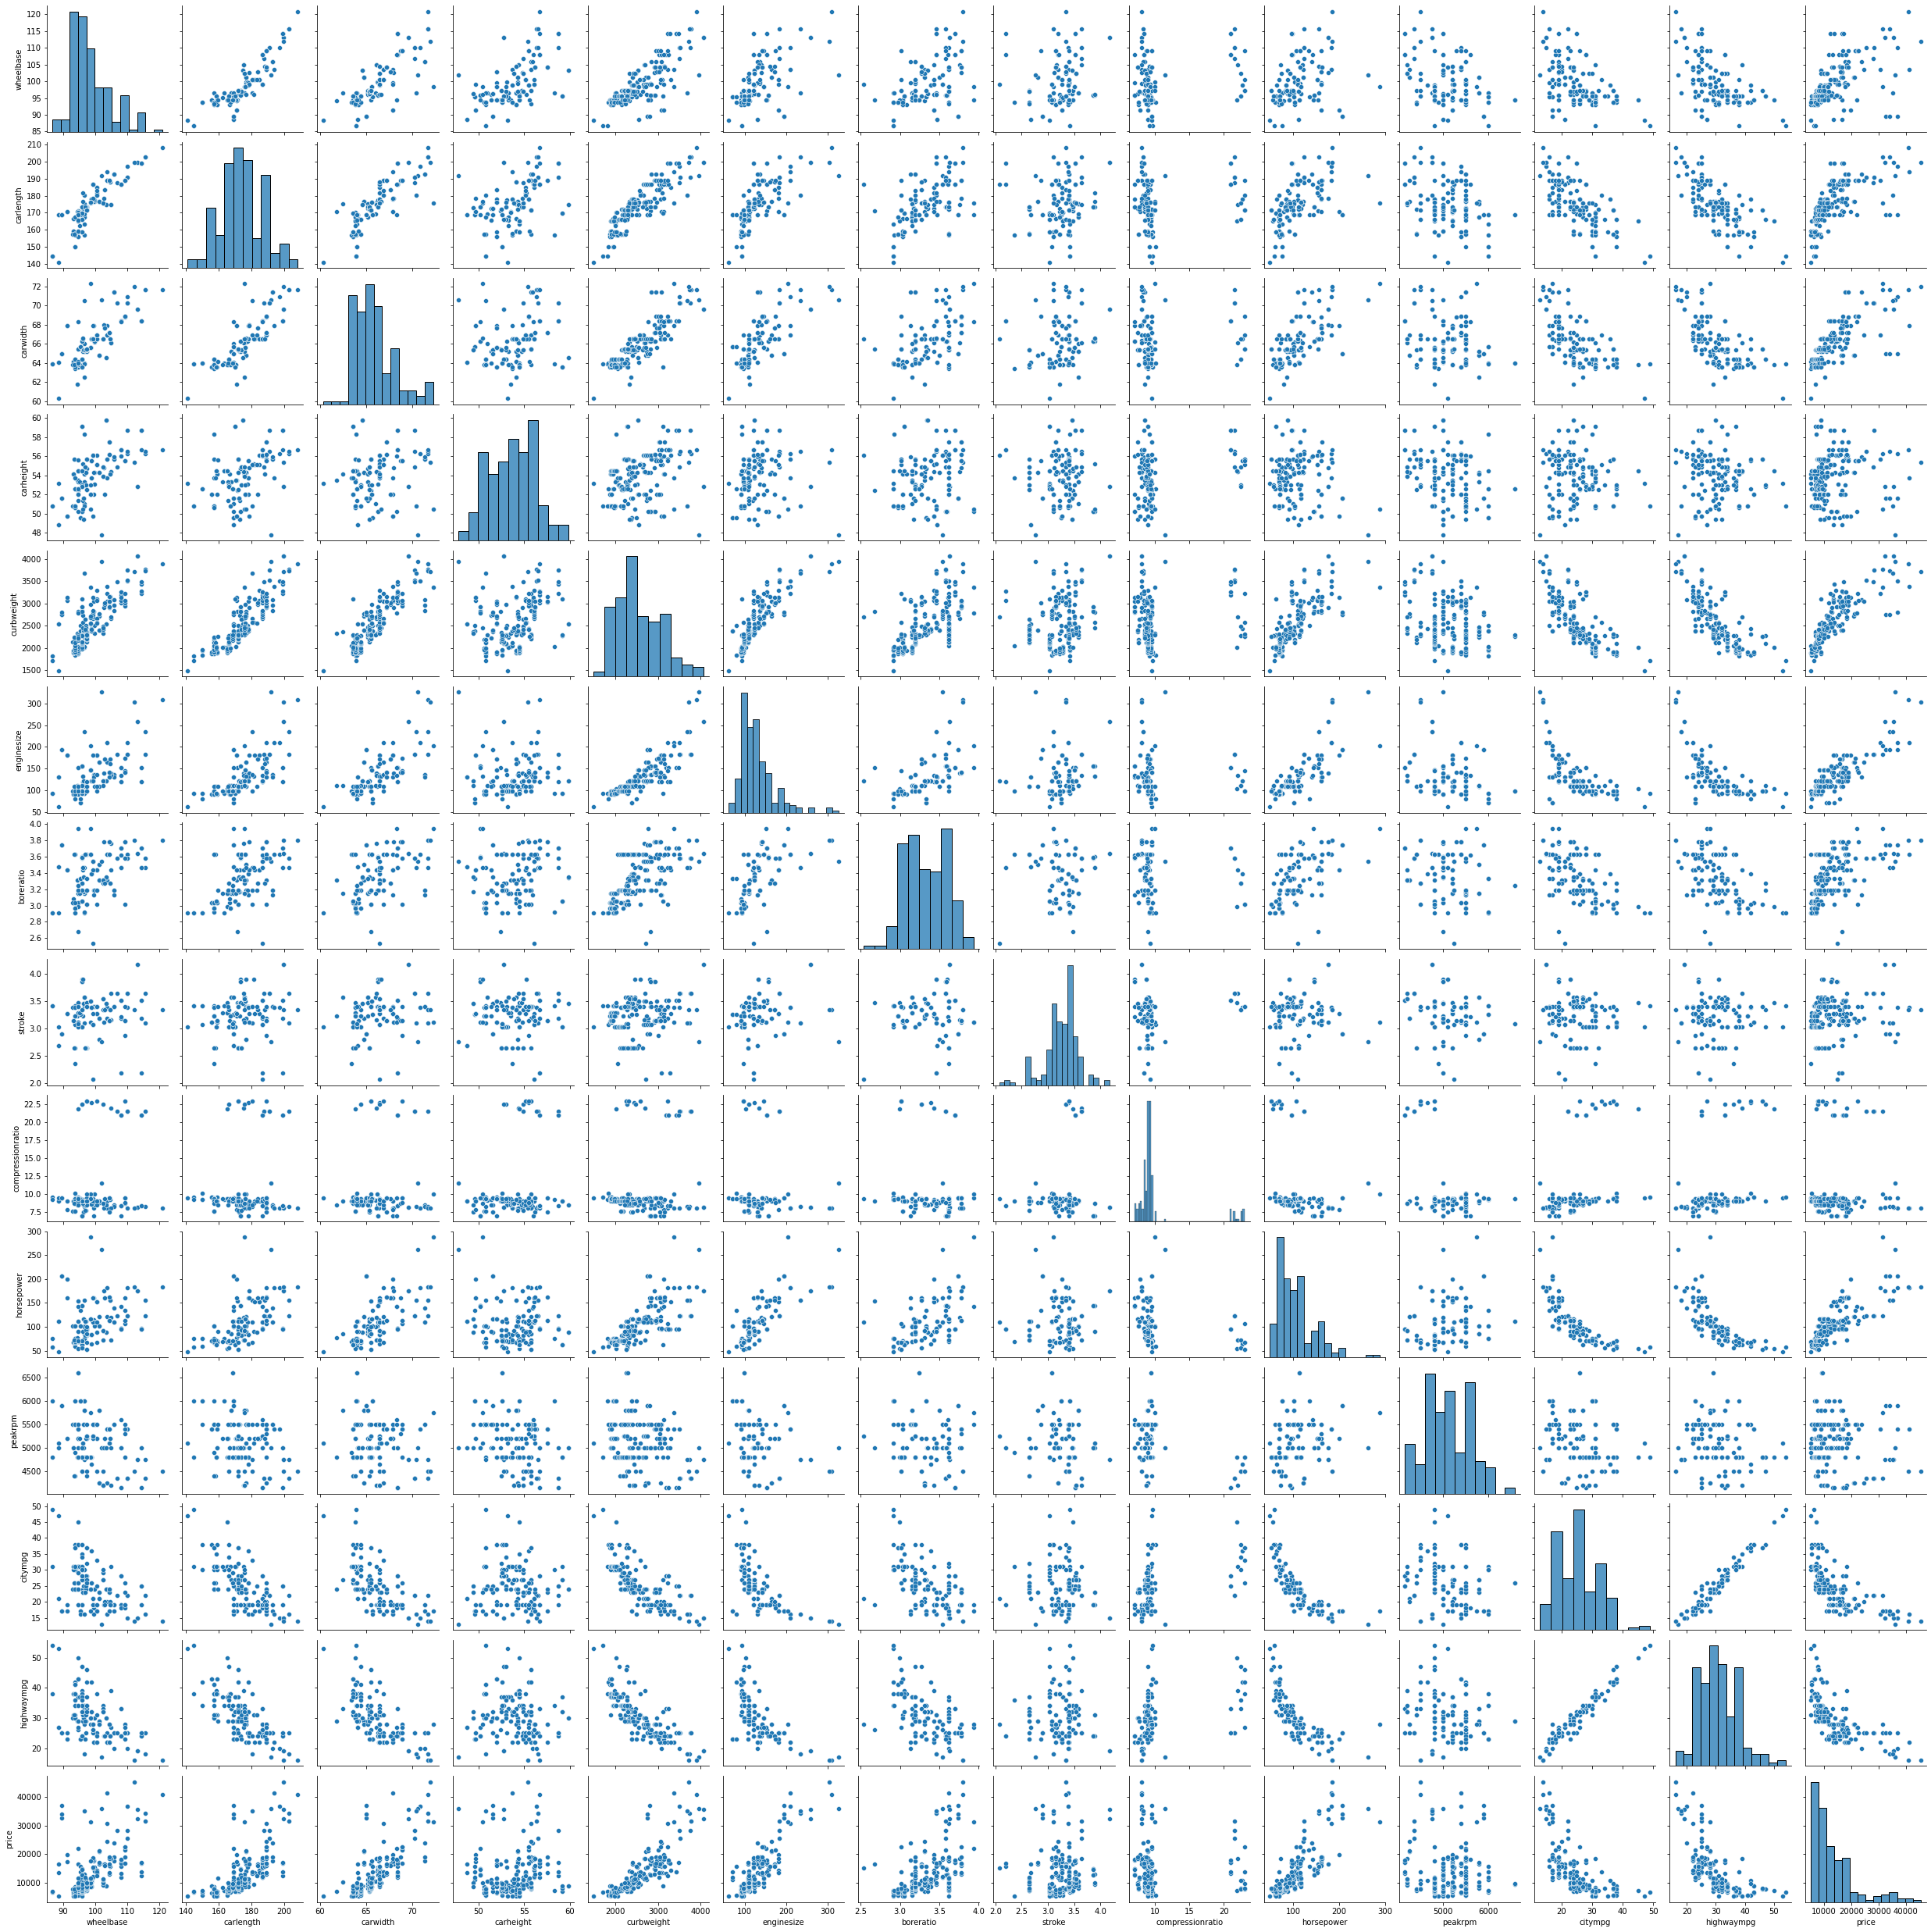

In [33]:
sns.pairplot(df[num_col])

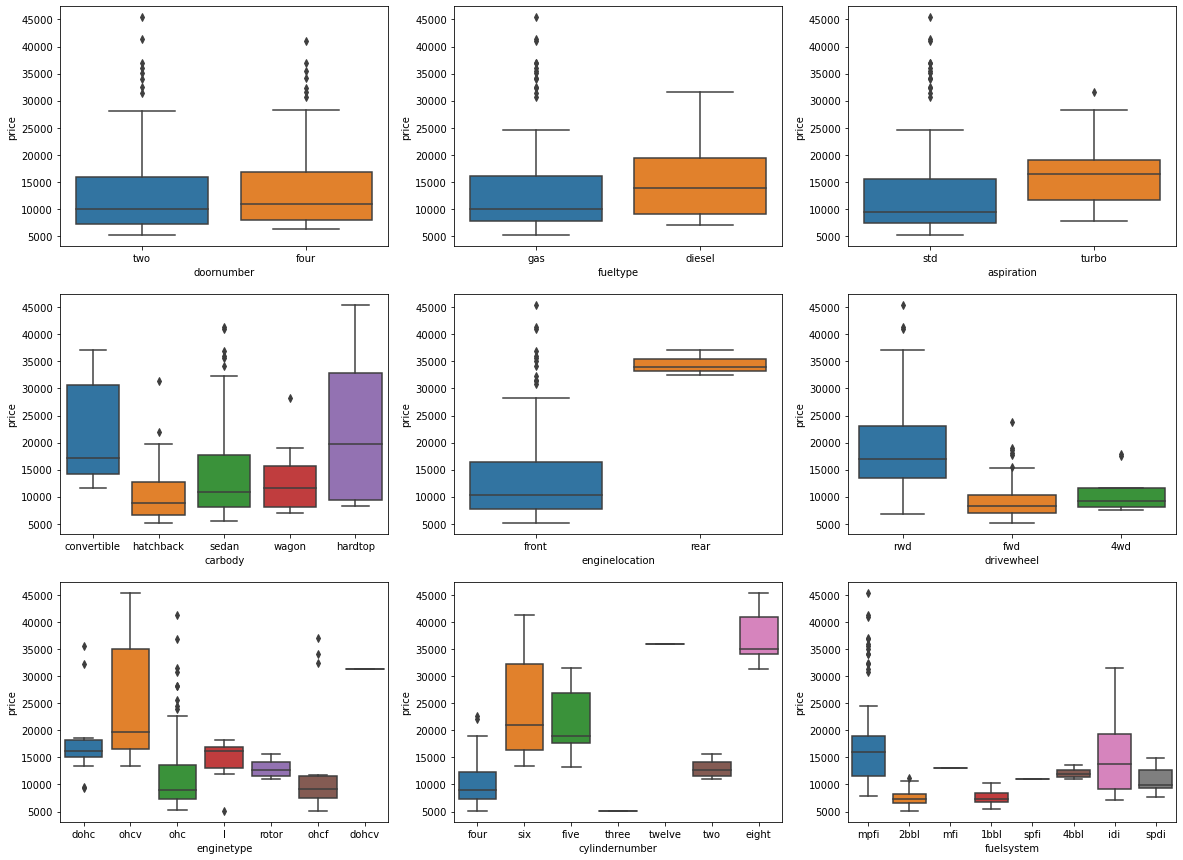

In [34]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

### Relation entre variables et Target

- Le nombre de cylindres utilisés dans la plupart des voitures est de "quatre".
- Le nombre de voitures à essence est bien supérieur à celui des voitures à carburant "diesel".
- "Sedan" est le type de voiture préféré.
- `Jaguar`,`Buick` et `porsche` sont les voitures les plus chere.
- `hardtop` et `convertible` ont le prix le plus eleve.

[Text(0.5, 0, 'carrosseries'),
 Text(0, 0.5, 'Frequance de type de carrosseries ')]

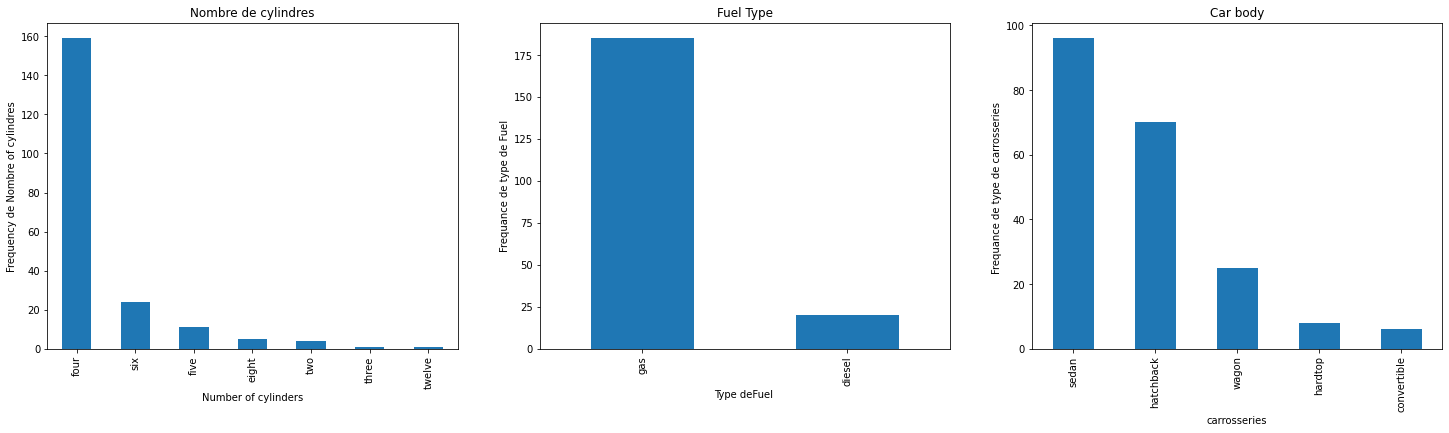

In [38]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot.bar()
plt.title('Nombre de cylindres')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency de Nombre of cylindres')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot.bar()
plt.title('Fuel Type')
plt1.set(xlabel = 'Type deFuel ', ylabel='Frequance de type de Fuel')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot.bar()
plt.title('Car body')
plt1.set(xlabel = 'carrosseries', ylabel='Frequance de type de carrosseries ')

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

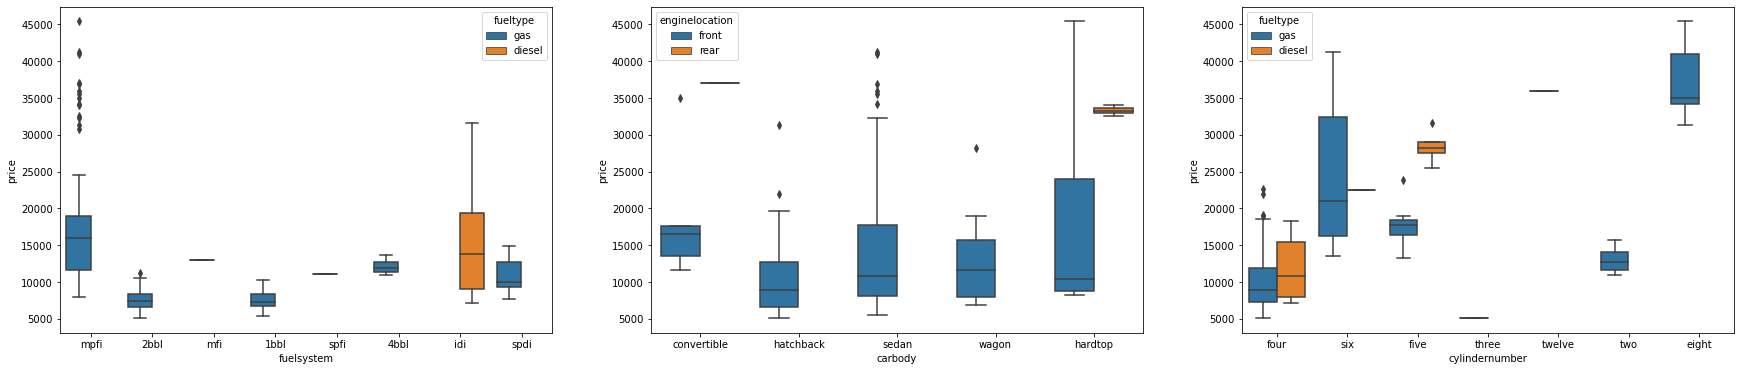

In [41]:
plt.figure(figsize = (30, 6))

plt.subplot(1,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df_auto)

plt.subplot(1,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df_auto)


Text(0.5, 1.0, 'Car Company Name vs Average Price')

<Figure size 1440x432 with 0 Axes>

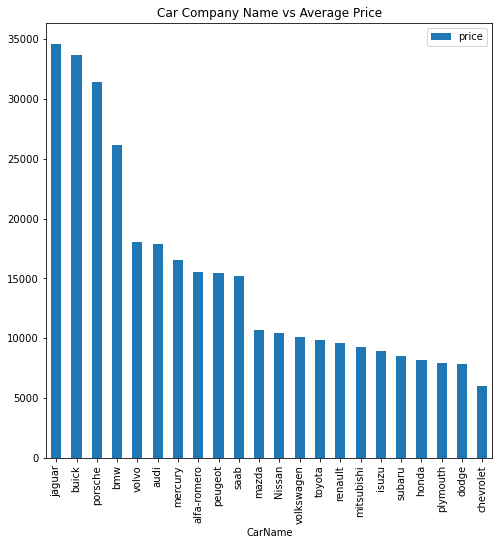

In [47]:
plt.figure(figsize=(20, 6))
df_autox = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')


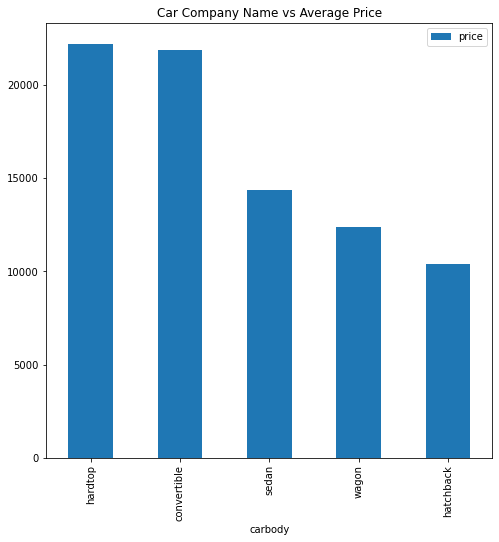

In [48]:

df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')

plt.show()

In [207]:
#Binning the Car Companies based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['CarName'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,...,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,...,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,...,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,...,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,...,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


### Conclusion
Les variable significatives sont:
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

## Preprocessing
### Preparation des donnees

In [208]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

df = df[sig_col]

In [210]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape

(205, 29)

In [211]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [212]:
df = pd.concat([df, dummies], axis = 1)
df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 32)

In [214]:
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,...,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,...,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,...,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,...,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,...,1,0,0,0,1,0,0,0,0,0


### Spliting date

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)


### Standarization des donnees

In [216]:
scaler = StandardScaler()

In [217]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

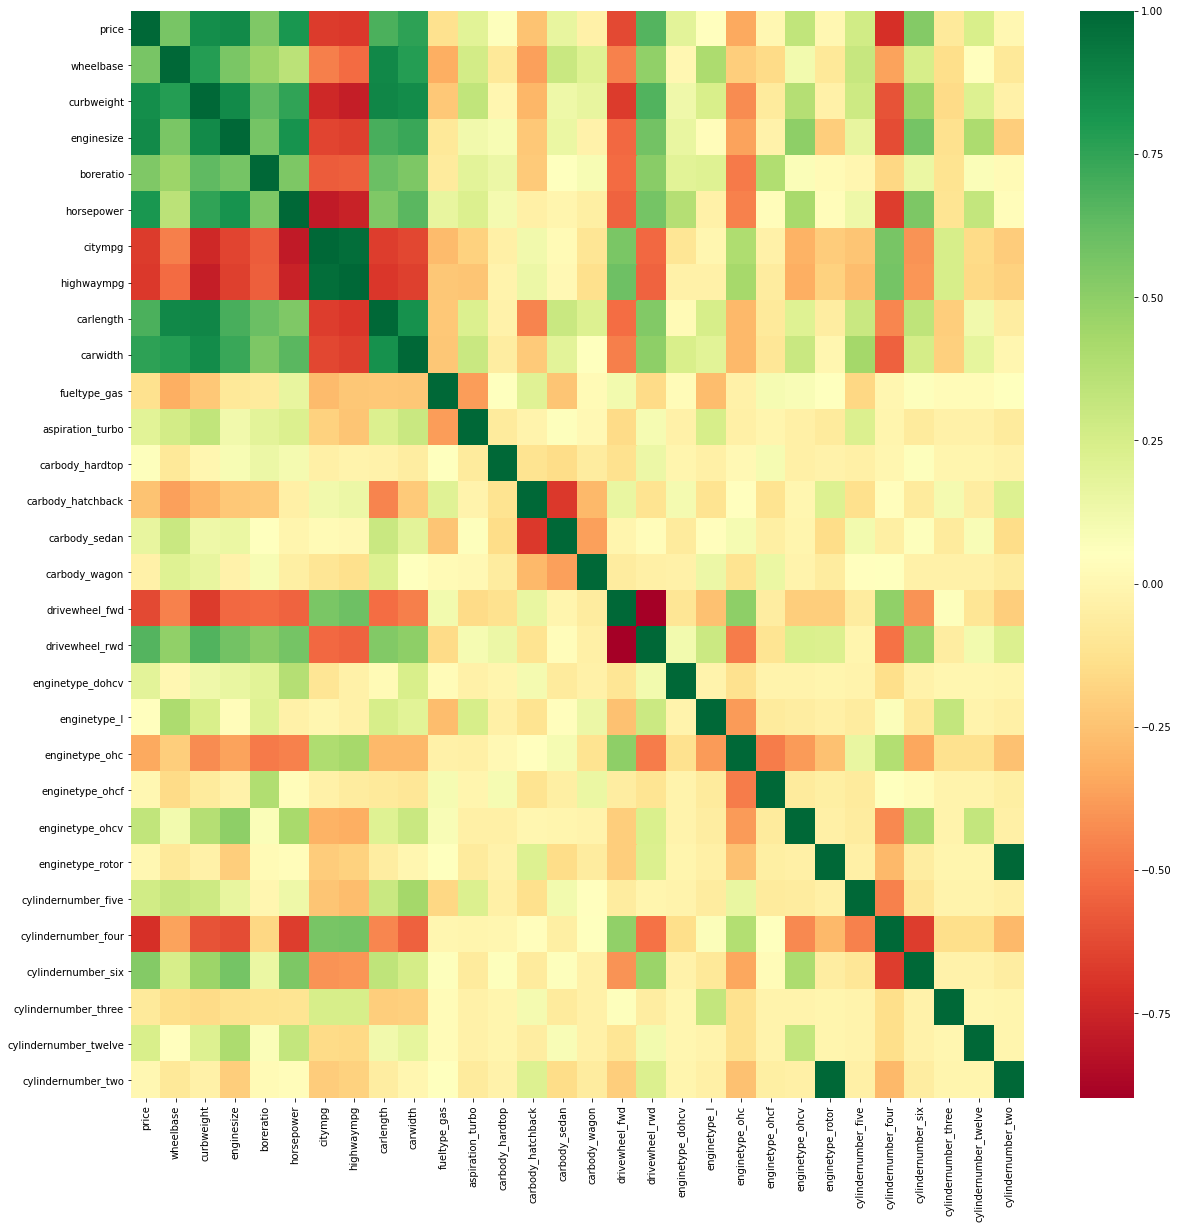

In [41]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

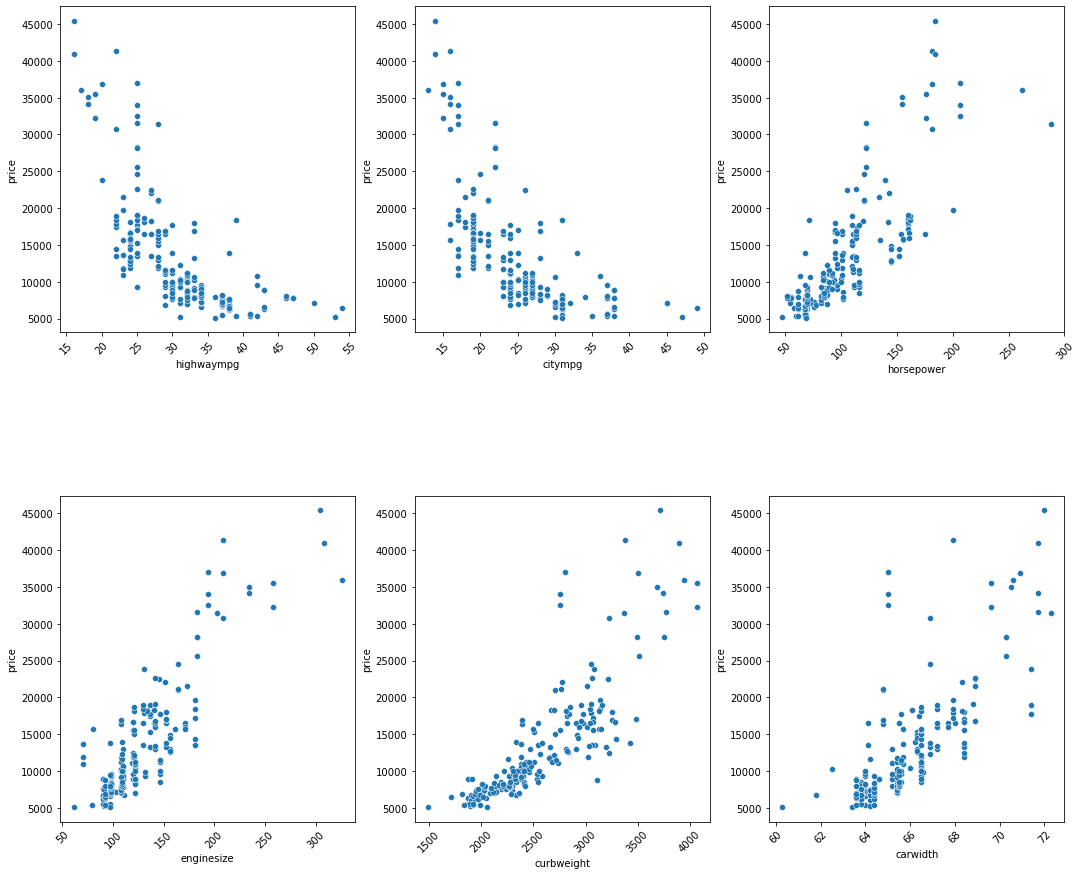

In [70]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [218]:
y_train = df_train.pop('price')
X_train = df_train

# Modelisation du probleme
## test des Hypothese

In [219]:
import statsmodels.api as sm
X_train_1 = X_train['horsepower']
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

lr_1.params

const        0.0000
horsepower   0.8126
dtype: float64

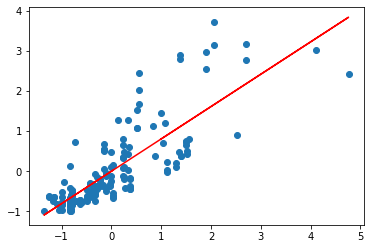

In [46]:
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [220]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     314.9
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           7.96e-40
Time:                        11:31:36   Log-Likelihood:                -144.16
No. Observations:                 164   AIC:                             292.3
Df Residuals:                     162   BIC:                             298.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e-17      0.046   1.17e-15      1.0

La valeur R-carré obtenue est '0,65'. Puisque nous avons tellement de variables, nous pouvons clairement faire mieux que cela. Alors allons-y et ajoutons l'autre variable hautement corrélée, c'est-à-dire le 'curbweight'.

In [221]:
X_train_2 = X_train[['horsepower', 'curbweight']]
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [222]:
lr_2.params

const        0.0000
horsepower   0.4067
curbweight   0.5392
dtype: float64

In [223]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     296.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.15e-54
Time:                        11:31:46   Log-Likelihood:                -106.19
No. Observations:                 164   AIC:                             218.4
Df Residuals:                     161   BIC:                             227.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.378e-17      0.036   1.48e-15      1.0

In [224]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()
lr_3.params

const        0.0000
horsepower   0.2721
curbweight   0.3485
enginesize   0.3379
dtype: float64

In [225]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           5.60e-57
Time:                        11:31:55   Log-Likelihood:                -97.678
No. Observations:                 164   AIC:                             203.4
Df Residuals:                     160   BIC:                             215.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.98e-17      0.035    2.3e-15      1.0

 Élimination  récursives des variables.


Utilisons l'élimination récursive des fonctionnalités car nous avons trop de variables indépendantes. Exécution de RFE avec le numéro de sortie de la variable égal à 15

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [229]:
for i in range(0,X_train.columns.shape[0]):
    print(f'{X_train.columns[i]:-<30}{rfe.support_[i]:-<5},{rfe.ranking_[i]}')

wheelbase---------------------0----,9
curbweight--------------------1----,1
enginesize--------------------0----,12
boreratio---------------------0----,8
horsepower--------------------1----,1
citympg-----------------------0----,5
highwaympg--------------------0----,10
carlength---------------------0----,13
carwidth----------------------1----,1
Cars_Category_Medium_Range----0----,2
Cars_Category_TopNotch_Cars---1----,1
fueltype_gas------------------0----,14
aspiration_turbo--------------0----,15
carbody_hardtop---------------1----,1
carbody_hatchback-------------1----,1
carbody_sedan-----------------1----,1
carbody_wagon-----------------1----,1
drivewheel_fwd----------------0----,11
drivewheel_rwd----------------0----,6
enginetype_dohcv--------------1----,1
enginetype_l------------------1----,1
enginetype_ohc----------------1----,1
enginetype_ohcf---------------1----,1
enginetype_ohcv---------------1----,1
enginetype_rotor--------------0----,17
cylindernumber_five-----------1----,1
cylin

## Construction des modeles de prediction

In [230]:
col_sup = X_train.columns[rfe.support_]
col_sup

X_train_rfe = X_train[col_sup]
X_train_rfe.head()

,curbweight,horsepower,carwidth,Cars_Category_TopNotch_Cars,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_five,cylindernumber_four
3,-0.3433,0.0242,0.2059,0,0,0,1,0,0,0,1,0,0,0,1
157,-0.7818,-0.7912,-0.6301,0,0,1,0,0,0,0,1,0,0,0,1
81,-0.3606,-0.3325,-0.1657,0,0,1,0,0,0,0,1,0,0,0,1
32,-1.3048,-1.0460,-0.8159,0,0,1,0,0,0,0,1,0,0,0,1
99,-0.3683,-0.1032,-0.2586,0,0,1,0,0,0,0,1,0,0,0,1


Après avoir passé les colonnes sélectionnées arbitrairement par RFE, nous évaluerons manuellement la valeur p et la valeur VIF de chaque modèle.
À moins que nous ne trouvions la plage acceptable pour les valeurs p et VIF, nous continuons à supprimer les variables une à la fois en fonction des critères ci-dessous.
- valeur-p élevée VIF élevé : Supprimer la variable
- VIF faible  valeur-p élevée ou VIF élevé  valeur-p faible : supprimez d'abord la variable à valeur-p élevée
- valeur-p faible VIF faible : accepter la variable

Le facteur d'inflation de la variance ou VIF donne une idée quantitative de base de la corrélation entre les variables de caractéristiques. C'est un paramètre extrêmement important pour tester notre modèle linéaire. La formule de calcul de `VIF` est la suivante :

$ VIF_i = \frac{1}{1 - {R_i}^2} $

In [231]:
def train_model(X_train,y_train):
    X_trainc = sm.add_constant(X_train)
    lm_rfe = sm.OLS(y_train,X_trainc).fit()

    #Summary of linear model
    print(lm_rfe.summary())
    

In [232]:
def get_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [233]:
train_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.59e-81
Time:                        11:32:29   Log-Likelihood:                -4.5365
No. Observations:                 164   AIC:                             41.07
Df Residuals:                     148   BIC:                             90.67
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [234]:
get_VIF(X_train_rfe)

,Features,VIF
10,enginetype_ohc,19.5600
14,cylindernumber_four,14.5800
0,curbweight,9.1200
6,carbody_sedan,7.2000
2,carwidth,5.2500
5,carbody_hatchback,4.8800
1,horsepower,4.6100
7,carbody_wagon,3.1400
11,enginetype_ohcf,2.9500
3,Cars_Category_TopNotch_Cars,2.4900


In [235]:
X_train_rfe1 = X_train_rfe.drop(['enginetype_ohcv'], 1,)
train_model(X_train_rfe1,y_train)
get_VIF(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           6.42e-82
Time:                        11:32:52   Log-Likelihood:                -5.8277
No. Observations:                 164   AIC:                             41.66
Df Residuals:                     149   BIC:                             88.15
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
10,enginetype_ohc,18.2100
13,cylindernumber_four,14.5800
0,curbweight,9.1200
6,carbody_sedan,6.0300
2,carwidth,5.2200
1,horsepower,4.5000
5,carbody_hatchback,4.0700
11,enginetype_ohcf,2.7900
7,carbody_wagon,2.7700
3,Cars_Category_TopNotch_Cars,2.4900


In [237]:
X_train_rfe2 = X_train_rfe1.drop('enginetype_dohcv', 1,)
train_model(X_train_rfe2,y_train)
get_VIF(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           7.74e-82
Time:                        11:33:52   Log-Likelihood:                -8.8843
No. Observations:                 164   AIC:                             45.77
Df Residuals:                     150   BIC:                             89.17
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
9,enginetype_ohc,17.9600
12,cylindernumber_four,14.3000
0,curbweight,7.5100
6,carbody_sedan,6.0300
2,carwidth,4.7100
5,carbody_hatchback,4.0700
1,horsepower,3.7800
7,carbody_wagon,2.7300
10,enginetype_ohcf,2.7200
3,Cars_Category_TopNotch_Cars,2.4000


In [238]:
X_train_rfe3 = X_train_rfe2.drop('enginetype_l', 1,)
train_model(X_train_rfe3,y_train)
get_VIF(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           9.64e-82
Time:                        11:34:25   Log-Likelihood:                -11.982
No. Observations:                 164   AIC:                             49.96
Df Residuals:                     151   BIC:                             90.26
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
11,cylindernumber_four,11.6500
8,enginetype_ohc,11.5800
0,curbweight,7.3700
6,carbody_sedan,5.4000
2,carwidth,4.7000
5,carbody_hatchback,3.6800
1,horsepower,3.4400
7,carbody_wagon,2.5500
3,Cars_Category_TopNotch_Cars,2.3400
10,cylindernumber_five,2.2800


In [239]:
X_train_rfe4 = X_train_rfe3.drop('cylindernumber_five', 1,)
train_model(X_train_rfe4,y_train)
get_VIF(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           5.53e-82
Time:                        11:34:41   Log-Likelihood:                -14.251
No. Observations:                 164   AIC:                             52.50
Df Residuals:                     152   BIC:                             89.70
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
8,enginetype_ohc,8.4100
10,cylindernumber_four,7.8100
0,curbweight,7.3400
6,carbody_sedan,5.2800
2,carwidth,4.2300
5,carbody_hatchback,3.5900
1,horsepower,3.3000
7,carbody_wagon,2.5000
3,Cars_Category_TopNotch_Cars,2.2000
9,enginetype_ohcf,1.9000


In [240]:
X_train_rfe5 = X_train_rfe4.drop('enginetype_ohcf', 1,)
train_model(X_train_rfe5,y_train)
get_VIF(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.17e-82
Time:                        11:34:58   Log-Likelihood:                -15.466
No. Observations:                 164   AIC:                             52.93
Df Residuals:                     153   BIC:                             87.03
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
9,cylindernumber_four,7.1600
0,curbweight,6.5900
8,enginetype_ohc,5.3500
6,carbody_sedan,4.7300
2,carwidth,4.1900
5,carbody_hatchback,3.4400
1,horsepower,3.2600
7,carbody_wagon,2.1300
3,Cars_Category_TopNotch_Cars,1.9800
4,carbody_hardtop,1.2700


In [241]:
X_train_rfe6 = X_train_rfe5.drop('enginetype_ohc', 1,)
train_model(X_train_rfe6,y_train)
get_VIF(X_train_rfe6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.54e-83
Time:                        11:35:12   Log-Likelihood:                -16.231
No. Observations:                 164   AIC:                             52.46
Df Residuals:                     154   BIC:                             83.46
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
8,cylindernumber_four,6.7900
0,curbweight,6.3100
2,carwidth,4.0900
6,carbody_sedan,3.8200
1,horsepower,3.1400
5,carbody_hatchback,2.8500
7,carbody_wagon,1.9700
3,Cars_Category_TopNotch_Cars,1.8200
4,carbody_hardtop,1.2100


In [242]:
X_train_rfe7 = X_train_rfe6.drop('carbody_hardtop', 1,)
train_model(X_train_rfe7,y_train)
get_VIF(X_train_rfe7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.09e-83
Time:                        11:35:32   Log-Likelihood:                -19.523
No. Observations:                 164   AIC:                             57.05
Df Residuals:                     155   BIC:                             84.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
0,curbweight,6.3000
7,cylindernumber_four,5.9000
2,carwidth,4.0900
5,carbody_sedan,3.4700
1,horsepower,2.9900
4,carbody_hatchback,2.5700
6,carbody_wagon,1.8800
3,Cars_Category_TopNotch_Cars,1.7800


In [246]:
X_train_rfe8 = X_train_rfe7.drop('curbweight', 1,)
train_model(X_train_rfe8,y_train)
get_VIF(X_train_rfe8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     236.6
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.15e-79
Time:                        11:37:38   Log-Likelihood:                -31.611
No. Observations:                 164   AIC:                             79.22
Df Residuals:                     156   BIC:                             104.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
6,cylindernumber_four,5.8800
4,carbody_sedan,3.4600
3,carbody_hatchback,2.5000
0,horsepower,2.3400
1,carwidth,2.0800
5,carbody_wagon,1.7300
2,Cars_Category_TopNotch_Cars,1.7200


In [283]:
X_train_f = X_train_rfe8.drop('cylindernumber_four', 1,)
train_model(X_train_f,y_train)
get_VIF(X_train_f)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     247.8
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.25e-77
Time:                        11:47:51   Log-Likelihood:                -40.126
No. Observations:                 164   AIC:                             94.25
Df Residuals:                     157   BIC:                             116.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

,Features,VIF
0,horsepower,2.2100
1,carwidth,1.9200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2100
3,carbody_hatchback,1.0600
5,carbody_wagon,1.0200


## Evaluation des modeles
### modele 1

In [284]:

X_train_fc = sm.add_constant(X_train_f)
modelLR = sm.OLS(y_train,X_train_fc).fit()

#Summary of linear model
print(modelLR.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     247.8
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.25e-77
Time:                        11:47:55   Log-Likelihood:                -40.126
No. Observations:                 164   AIC:                             94.25
Df Residuals:                     157   BIC:                             116.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [285]:
# Predicting the price of training set.
y_train_price = modelLR.predict(X_train_fc)

Text(0.5, 0, 'Errors')

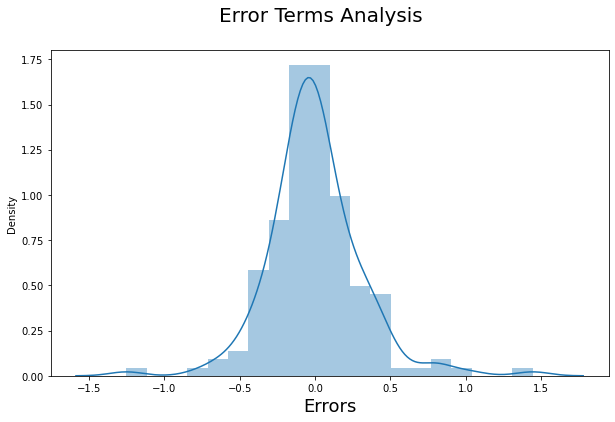

In [286]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [258]:
import warnings
warnings.filterwarnings("ignore")

In [259]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(41, 32)

In [260]:
y_test = df_test.pop('price')
X_test = df_test

In [287]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_fc.columns]


In [288]:
y_pred = modelLR.predict(X_test_new)

Text(0, 0.5, 'y_pred')

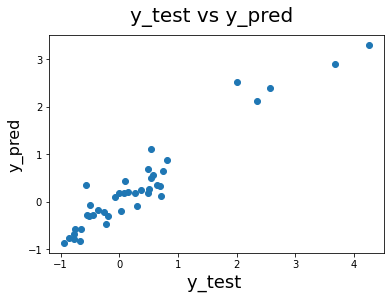

In [289]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [290]:
from sklearn.metrics import r2_score
r2_score( y_pred,y_test)

0.8805215787691973

### Modele 2

In [292]:
X_train_7fc = sm.add_constant(X_train_rfe7)
modelLR7 = sm.OLS(y_train,X_train_7fc).fit()

#Summary of linear model
print(modelLR7.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.09e-83
Time:                        11:50:57   Log-Likelihood:                -19.523
No. Observations:                 164   AIC:                             57.05
Df Residuals:                     155   BIC:                             84.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Text(0.5, 0, 'Errors')

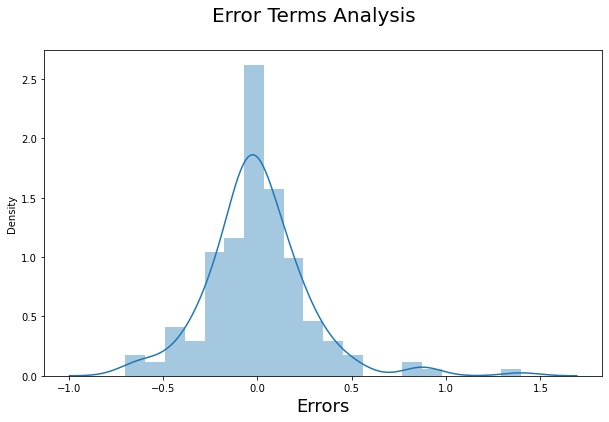

In [297]:
# Predicting the price of training set.
y_train_price = modelLR7.predict(X_train_7fc)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [300]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_7fc.columns]
y_pred = modelLR7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

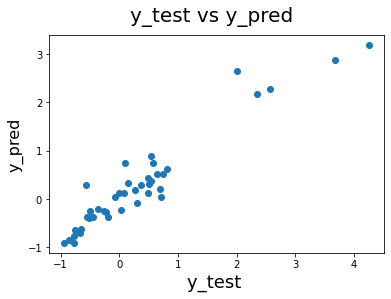

In [301]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

In [302]:
r2_score( y_pred,y_test)

0.8744283636538179

# Conclusion


#### Conclusions du modèle 1 :
- R-carré et R-carré ajusté 0,904 et 0,901 - et 0,88 R-carré sur l'ensemble de test
- L'ajustement du modèle est significatif et explique que la variance de 88 %<br> n'est pas due au hasard.
- valeur-p pour tous les coefficients semblent être inférieures au seuil de signification de 0,05. - ce qui signifie que tous les <br>prédicteurs sont statistiquement significatifs.
#### Conclusions du modèle 2 :
- R-carré et R-carré ajusté 0,926 et 0,922 - et 0,87 R-carré sur l'ensemble de test
- L'ajustement du modèle est significatif et explique que la variance de 87 %<br> n'est tout simplement pas due au hasard.
- valeur-p pour tous les coefficients semblent être inférieures au seuil de signification de 0,05. - ce qui signifie que tous les <br>prédicteurs sont statistiquement significatifs.